In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
dataset=pd.read_csv('cs448b_ipasn.csv')

In [3]:
dataset

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
...,...,...,...,...
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1


In [4]:
dataset=dataset.drop(['date'],axis=1)

##l_ipn: local IP (coded as an integer from 0-9)
##r_asn: remote ASN (an integer which identifies the remote ISP)
##f: flows (count of connnections for that day)



In [5]:
dataset

,l_ipn,r_asn,f
0,0,701,1
1,0,714,1
2,0,1239,1
3,0,1680,1
4,0,2514,1
...,...,...,...
20798,8,36351,3
20799,8,36856,4
20800,9,2152,1
20801,9,8070,1


In [6]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataset, *['l_ipn'], **{})
chart

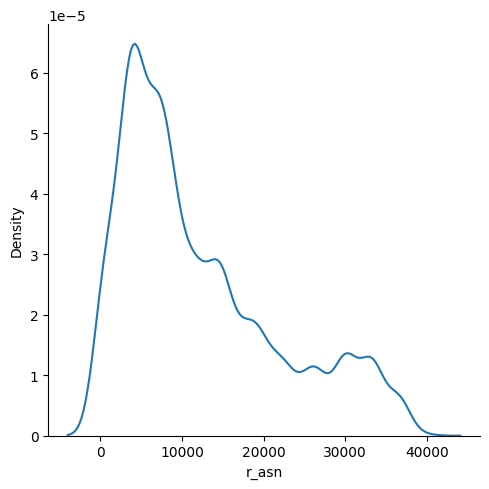

In [7]:
sns.displot(dataset['r_asn'],kind='kde')

<Axes: >

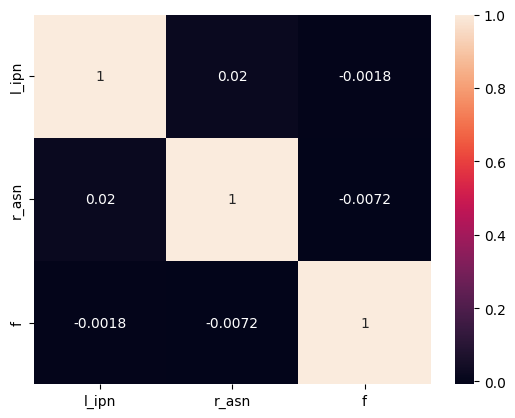

In [8]:
sns.heatmap(dataset.corr(),annot=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   l_ipn   20803 non-null  int64
 1   r_asn   20803 non-null  int64
 2   f       20803 non-null  int64
dtypes: int64(3)
memory usage: 487.7 KB


In [10]:
dataset.describe()

,l_ipn,r_asn,f
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


In [11]:
dataset.isnull().sum()

l_ipn    0
r_asn    0
f        0
dtype: int64

In [12]:
dataset

,l_ipn,r_asn,f
0,0,701,1
1,0,714,1
2,0,1239,1
3,0,1680,1
4,0,2514,1
...,...,...,...
20798,8,36351,3
20799,8,36856,4
20800,9,2152,1
20801,9,8070,1


In [15]:
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [16]:
X

array([[ 701,    1],
       [ 714,    1],
       [1239,    1],
       ...,
       [2152,    1],
       [8070,    1],
       [8075,    2]])

In [17]:
y

array([0, 0, 0, ..., 9, 9, 9])

## Regression(Test Run)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=lr.predict(X_test)

In [40]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[4.30138343 5.        ]
 [4.2099297  3.        ]
 [4.21277327 1.        ]
 ...
 [4.31906771 7.        ]
 [4.18235594 9.        ]
 [4.26259745 1.        ]]


In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0008985317498650947

In [42]:
from sklearn.linear_model import LogisticRegression

##Classification

In [43]:
logi=LogisticRegression()

In [44]:
logi.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_logi=logi.predict(X_test)

In [46]:
print(np.concatenate((y_logi.reshape(len(y_logi),1),y_test.reshape(len(y_test),1)),1))

[[0 5]
 [0 3]
 [0 1]
 ...
 [0 7]
 [0 9]
 [0 1]]


In [47]:
from sklearn.metrics import accuracy_score #Metric scoring functions

accuracy_score(y_test, y_logi)

0.19875030040855562

In [49]:
from sklearn.svm import SVC

In [53]:
svc=SVC(C=1, kernel='rbf')

In [54]:
svc.fit(X_train,y_train)

SVC(C=1)

In [55]:
y_svc=svc.predict(X_test)

In [56]:
print(np.concatenate((y_svc.reshape(len(y_svc),1),y_test.reshape(len(y_test),1)),1))

[[0 5]
 [0 3]
 [0 1]
 ...
 [2 7]
 [8 9]
 [0 1]]


In [57]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_svc)

0.2114876231675078

In [ ]:
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,y_svc))


In [59]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_svc))

              precision    recall  f1-score   support

           0       0.21      0.87      0.34       814
           1       0.50      0.00      0.01       452
           2       0.22      0.17      0.19       460
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       268
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       258
           7       0.00      0.00      0.00       441
           8       0.21      0.16      0.18       431
           9       0.29      0.04      0.07       550

    accuracy                           0.21      4161
   macro avg       0.14      0.12      0.08      4161
weighted avg       0.18      0.21      0.12      4161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
gb= GaussianNB()

In [64]:
gb.fit(X_train,y_train)

GaussianNB()

In [65]:
y_gb=gb.predict(X_test)

In [66]:
print(np.concatenate((y_gb.reshape(len(y_gb),1),y_test.reshape(len(y_test),1)),1))

[[7 5]
 [5 3]
 [5 1]
 ...
 [7 7]
 [5 9]
 [5 1]]


In [67]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_gb)

0.09613073780341264

In [68]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_gb))

              precision    recall  f1-score   support

           0       0.10      0.01      0.02       814
           1       0.24      0.03      0.05       452
           2       0.30      0.01      0.02       460
           3       0.05      0.05      0.05       222
           4       0.40      0.03      0.06       268
           5       0.08      0.78      0.14       265
           6       0.00      0.00      0.00       258
           7       0.14      0.27      0.18       441
           8       0.00      0.00      0.00       431
           9       0.19      0.05      0.08       550

    accuracy                           0.10      4161
   macro avg       0.15      0.12      0.06      4161
weighted avg       0.15      0.10      0.06      4161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt=DecisionTreeClassifier(criterion='entropy')

In [72]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [73]:
y_dt=dt.predict(X_test)

In [75]:
print(np.concatenate((y_dt.reshape(len(y_dt),1),y_test.reshape(len(y_test),1)),1))

[[0 5]
 [3 3]
 [2 1]
 ...
 [2 7]
 [0 9]
 [6 1]]


In [76]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_dt)

0.4313866858928142

In [74]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.51      0.72      0.59       814
           1       0.34      0.33      0.34       452
           2       0.60      0.57      0.58       460
           3       0.13      0.14      0.14       222
           4       0.47      0.30      0.37       268
           5       0.31      0.26      0.28       265
           6       0.20      0.18      0.19       258
           7       0.42      0.43      0.42       441
           8       0.40      0.34      0.36       431
           9       0.53      0.43      0.48       550

    accuracy                           0.43      4161
   macro avg       0.39      0.37      0.37      4161
weighted avg       0.43      0.43      0.42      4161



In [77]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf=RandomForestClassifier(n_estimators=300,  criterion='entropy')

In [92]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [93]:
y_rf=rf.predict(X_test)

In [94]:
print(np.concatenate((y_rf.reshape(len(y_rf),1),y_test.reshape(len(y_test),1)),1))

[[0 5]
 [3 3]
 [2 1]
 ...
 [2 7]
 [0 9]
 [6 1]]


In [95]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_rf)

0.42225426580149

In [96]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.54      0.68      0.60       814
           1       0.38      0.31      0.34       452
           2       0.56      0.55      0.55       460
           3       0.12      0.11      0.11       222
           4       0.44      0.29      0.35       268
           5       0.28      0.25      0.26       265
           6       0.18      0.22      0.20       258
           7       0.40      0.39      0.40       441
           8       0.38      0.35      0.36       431
           9       0.46      0.47      0.47       550

    accuracy                           0.42      4161
   macro avg       0.38      0.36      0.37      4161
weighted avg       0.42      0.42      0.42      4161



In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn=KNeighborsClassifier()

In [99]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": np.arange(1,3),
              "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=knn,
                        param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)


0.395686995257296
1


In [102]:
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski')

In [103]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [107]:
y_knn=knn.predict(X_test)

In [108]:
print(np.concatenate((y_knn.reshape(len(y_knn),1),y_test.reshape(len(y_test),1)),1))

[[0 5]
 [3 3]
 [1 1]
 ...
 [2 7]
 [0 9]
 [6 1]]


In [109]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_knn)

0.39605863975006006

In [110]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       814
           1       0.33      0.31      0.32       452
           2       0.55      0.57      0.56       460
           3       0.08      0.10      0.09       222
           4       0.30      0.26      0.28       268
           5       0.19      0.17      0.18       265
           6       0.15      0.20      0.17       258
           7       0.43      0.38      0.40       441
           8       0.35      0.35      0.35       431
           9       0.49      0.48      0.48       550

    accuracy                           0.40      4161
   macro avg       0.34      0.34      0.34      4161
weighted avg       0.40      0.40      0.40      4161



In [111]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [112]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [114]:
y_xg=xg.predict(X_test)

In [115]:
print(np.concatenate((y_xg.reshape(len(y_xg),1),y_test.reshape(len(y_test),1)),1))

[[0 5]
 [0 3]
 [2 1]
 ...
 [2 7]
 [0 9]
 [1 1]]


In [116]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_xg)

0.4676760394136025

In [117]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_xg))

              precision    recall  f1-score   support

           0       0.48      0.78      0.59       814
           1       0.49      0.32      0.39       452
           2       0.65      0.63      0.64       460
           3       0.12      0.07      0.09       222
           4       0.59      0.28      0.38       268
           5       0.39      0.23      0.29       265
           6       0.22      0.23      0.22       258
           7       0.48      0.39      0.43       441
           8       0.43      0.37      0.40       431
           9       0.50      0.59      0.54       550

    accuracy                           0.47      4161
   macro avg       0.43      0.39      0.40      4161
weighted avg       0.46      0.47      0.45      4161



##Artificial Neural Network

In [121]:
ann=tf.keras.models.Sequential()

In [145]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))  #units=13869 as per calculations

In [146]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))


In [147]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [148]:
ann.compile(optimizer='adam',loss='categorical_crossentropy')

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs=25)

In [ ]:
y_ann=ann.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score #Metric scoring functions
accuracy_score(y_test, y_ann)